In [63]:
from langgraph.graph import StateGraph,START,END
from typing import Literal,TypedDict,Annotated
from langchain_core.messages import BaseMessage,HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
import os
from dotenv import load_dotenv
from langgraph.checkpoint.memory import MemorySaver

In [64]:
load_dotenv()

True

In [65]:
api_key=os.getenv("GOOGLE_API_KEY")

In [66]:
llm=ChatGoogleGenerativeAI(model="gemini-2.5-flash",google_api_key=api_key)

In [67]:
from langgraph.graph.message import add_messages
class ChatState(TypedDict):

    messages: Annotated[list[BaseMessage],add_messages]

In [68]:
def chat_node(state: ChatState):
    ## TAKE USER QUERY FROM STATE
    messages=state['messages']

    ## SEND TO LLM
    response=llm.invoke(messages)

    return {'messages':[response]}

In [69]:
checkpointer=MemorySaver()

graph=StateGraph(ChatState)

## ADD NODES
graph.add_node('chat_node',chat_node)

graph.add_edge(START,'chat_node')
graph.add_edge('chat_node',END)

chatbot=graph.compile(checkpointer=checkpointer)

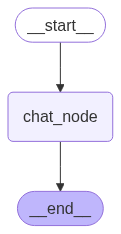

In [70]:
from IPython.display import Image
Image(chatbot.get_graph().draw_mermaid_png())

In [71]:
initial_state={
    'messages':[HumanMessage(content='What is capital of India')]
}

In [72]:
chatbot.invoke(initial_state)

ValueError: Checkpointer requires one or more of the following 'configurable' keys: ['thread_id', 'checkpoint_ns', 'checkpoint_id']

In [74]:
thread_id='1'

while True:
    user_message=input("Type Here")
    print("User: ",user_message)
    if user_message.strip().lower() in ['exist','quit','bye']:
        break
    config={'configurable': {'thread_id': thread_id}}
    response=chatbot.invoke({'messages':[HumanMessage(content=user_message)]},config=config)
    print("AI : ",response['messages'][-1].content)

User:  bye


In [ ]:
printify(chatbot.get_state(config=config))

StateSnapshot(values={'messages': [HumanMessage(content='hyyy i name ashu', additional_kwargs={}, response_metadata={}, id='0f949f31-27da-43dc-a28d-21bb607591df'), AIMessage(content='Hey Ashu! Nice to meet you!\n\nHow can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--fef72eca-8653-4925-b5ae-7b1d10e8bf35-0', usage_metadata={'input_tokens': 7, 'output_tokens': 637, 'total_tokens': 644, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 620}}), HumanMessage(content='what is capital of india', additional_kwargs={}, response_metadata={}, id='3d819bea-9eaa-4267-a62d-ad3891d66bca'), AIMessage(content='The capital of India is **New Delhi**.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash'